In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.Timestamp('9/1/2016 10:05AM')

Timestamp('2016-09-01 10:05:00')

In [8]:
pd.Period('1/2016')

Period('2016-01', 'M')

In [9]:
pd.Period('3/5/2016')

Period('2016-03-05', 'D')

In [12]:
t1 = pd.Series(list('abc'),[pd.Timestamp('2016-09-01'), pd.Timestamp('2016-09-02'), pd.Timestamp('2016-09-03')])
t1

2016-09-01    a
2016-09-02    b
2016-09-03    c
dtype: object

In [13]:
type(t1)

pandas.core.series.Series

In [15]:
type(t1.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [16]:
t2 = pd.Series(list('def'), [pd.Period('2016-09'), pd.Period('2016-10'), pd.Period('2016-11')])
t2

2016-09    d
2016-10    e
2016-11    f
Freq: M, dtype: object

In [17]:
type(t2.index)

pandas.core.indexes.period.PeriodIndex

In [20]:
d1 = ['2 June 2013', 'Aug 29, 2014', '2015-06-26', '7/12/16']
ts3 = pd.DataFrame(np.random.randint(10, 100, (4,2)), index=d1, columns=list('ab'))
ts3

,a,b
2 June 2013,33,73
"Aug 29, 2014",76,49
2015-06-26,98,55
7/12/16,21,65


In [21]:
ts3.index = pd.to_datetime(ts3.index)
ts3

,a,b
2013-06-02,33,73
2014-08-29,76,49
2015-06-26,98,55
2016-07-12,21,65


In [22]:
pd.to_datetime('4.7.12', dayfirst=True)

Timestamp('2012-07-04 00:00:00')

In [24]:
#time deltas
pd.Timestamp('9/3/2016') - pd.Timestamp('9/1/2016')

Timedelta('2 days 00:00:00')

In [25]:
# Time stamp
pd.Timestamp('9/2/2016 8:10AM') + pd.Timedelta('12D 3H')

Timestamp('2016-09-14 11:10:00')

In [26]:
#Working with Dates in a Dataframe
dates = pd.date_range('10-01-2016', periods=9, freq='2W-SUN')
dates

DatetimeIndex(['2016-10-02', '2016-10-16', '2016-10-30', '2016-11-13',
               '2016-11-27', '2016-12-11', '2016-12-25', '2017-01-08',
               '2017-01-22'],
              dtype='datetime64[ns]', freq='2W-SUN')

In [27]:
df = pd.DataFrame({'Count 1': 100 + np.random.randint(-5, 10, 9).cumsum(),
                  'Count 2': 120 + np.random.randint(-5,10,9)}, index=dates)
df

,Count 1,Count 2
2016-10-02,107,124
2016-10-16,115,126
2016-10-30,111,122
2016-11-13,111,115
2016-11-27,116,118
2016-12-11,112,122
2016-12-25,114,123
2017-01-08,112,117
2017-01-22,110,128


In [28]:
df.index.weekday_name

Index(['Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday', 'Sunday',
       'Sunday', 'Sunday'],
      dtype='object')

In [29]:
df.diff()

,Count 1,Count 2
2016-10-02,NaN,NaN
2016-10-16,8.0,2.0
2016-10-30,-4.0,-4.0
2016-11-13,0.0,-7.0
2016-11-27,5.0,3.0
2016-12-11,-4.0,4.0
2016-12-25,2.0,1.0
2017-01-08,-2.0,-6.0
2017-01-22,-2.0,11.0


In [30]:
df.resample('M').mean()

,Count 1,Count 2
2016-10-31,111.0,124.0
2016-11-30,113.5,116.5
2016-12-31,113.0,122.5
2017-01-31,111.0,122.5


In [31]:
df['2017']

,Count 1,Count 2
2017-01-08,112,117
2017-01-22,110,128


In [32]:
df['2016-12']

,Count 1,Count 2
2016-12-11,112,122
2016-12-25,114,123


In [33]:
df['2016-12':]

,Count 1,Count 2
2016-12-11,112,122
2016-12-25,114,123
2017-01-08,112,117
2017-01-22,110,128


In [34]:
df.asfreq('W', method='ffill')

,Count 1,Count 2
2016-10-02,107,124
2016-10-09,107,124
2016-10-16,115,126
2016-10-23,115,126
2016-10-30,111,122
2016-11-06,111,122
2016-11-13,111,115
2016-11-20,111,115
2016-11-27,116,118
2016-12-04,116,118


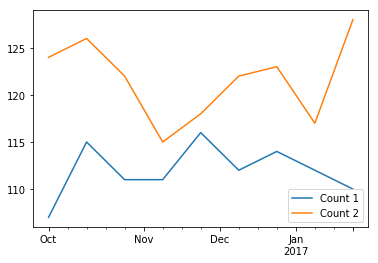

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot()